In [2]:
from plotnine import *
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['svg.fonttype'] = 'none'

In [8]:
df = pd.read_csv('Note-prod.csv')
df.head()

,Year,$1,$2,$5,$10,$20,$50,$100
0,FY 2015,"2,451,200,000","32,000,000","755,200,000","627,000,000","1,868,800,000","220,800,000","1,078,400,000"
1,FY 2016,"2,425,600,000","179,200,000","819,200,000","480,000,000","1,939,200,000","224,000,000","1,516,800,000"
2,FY 2017,"2,425,600,000",NaN,"915,200,000","262,400,000","1,715,200,000","268,800,000","1,516,800,000"
3,FY 2018,"2,163,200,000",NaN,"825,600,000","569,600,000","1,862,400,000","364,800,000","1,753,600,000"
4,FY 2019,"2,137,600,000","160,000,000","736,000,000","339,200,000","1,356,800,000","224,000,000","1,484,800,000"


/var/folders/4l/f99827kn1n74cfvj0n6tvpr80000gn/T/ipykernel_13882/3728038679.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



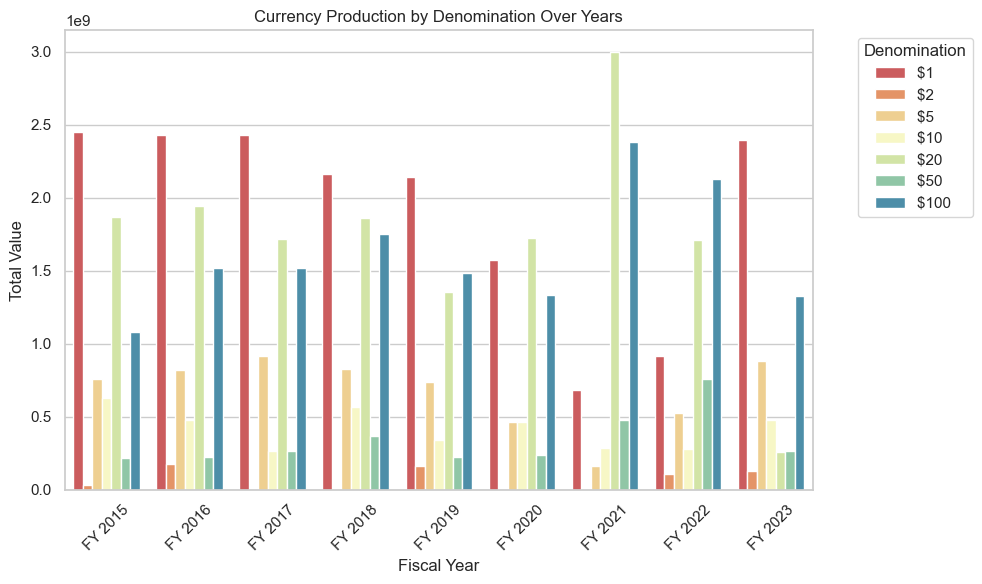

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original DataFrame
# First, let's melt your DataFrame from wide to long format
df_melted = df.melt(id_vars=["Year"], var_name="Denomination", value_name="Value")

# Clean and convert the 'Value' column to numeric, handling commas
df_melted['Value'] = df_melted['Value'].str.replace(',', '').astype(float)

# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Convert 'Year' to a categorical type for plot ordering
df_melted['Year'] = pd.Categorical(df_melted['Year'])

# Now, create the stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Year', y='Value', hue='Denomination', estimator=sum, ci=None, palette='Spectral')

# Add plot decorations
plt.title('Currency Production by Denomination Over Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Value')
plt.legend(title='Denomination', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


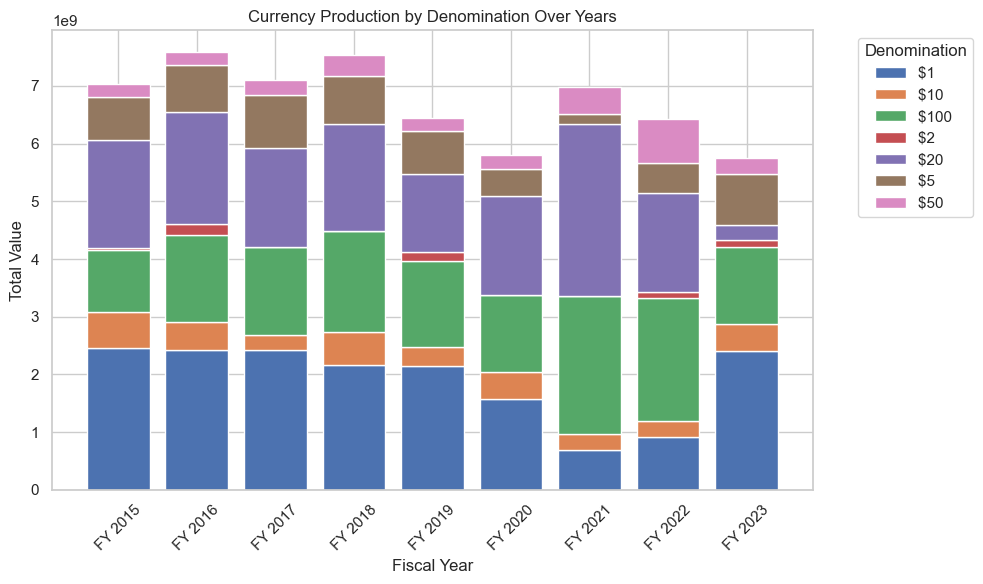

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your original DataFrame
# First, transform your DataFrame from wide to long format
df_melted = df.melt(id_vars=["Year"], var_name="Denomination", value_name="Value")

# Clean and convert the 'Value' column to numeric, handling commas
df_melted['Value'] = df_melted['Value'].str.replace(',', '').astype(float)

# Convert 'Year' to string if not already
df_melted['Year'] = df_melted['Year'].astype(str)

# Pivot the table to get years as indices, denominations as columns, values as cell values
df_pivot = df_melted.pivot(index='Year', columns='Denomination', values='Value').fillna(0)

# Sort the DataFrame by 'Year' to maintain chronological order
df_pivot = df_pivot.sort_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bottom offset for each bar
bottom = np.zeros(len(df_pivot))

# Loop through each denomination and stack them
for denomination in df_pivot.columns:
    ax.bar(df_pivot.index, df_pivot[denomination], bottom=bottom, label=denomination)
    bottom += df_pivot[denomination].values

# Add plot decorations
plt.title('Currency Production by Denomination Over Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.legend(title='Denomination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


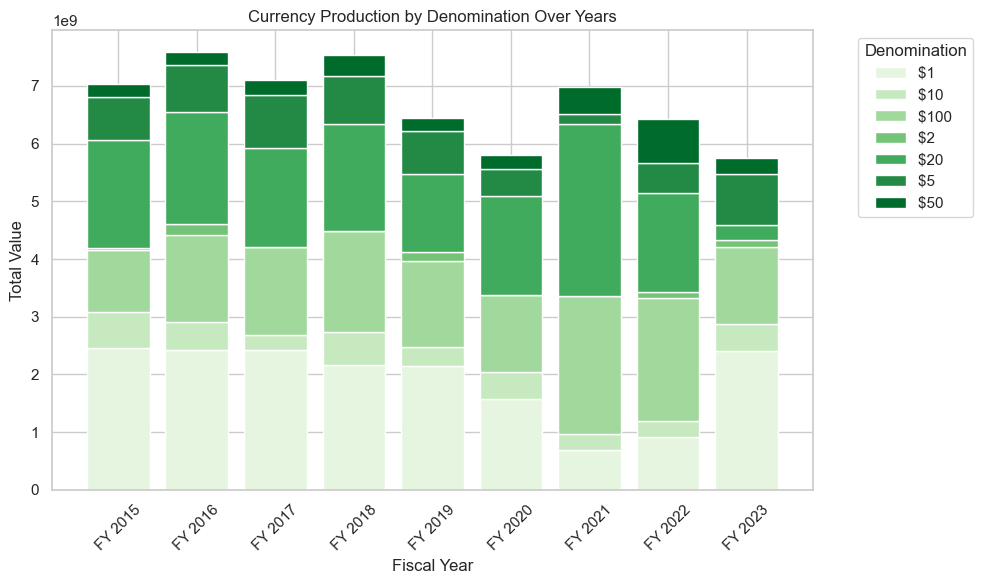

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your original DataFrame
# Transform your DataFrame from wide to long format
df_melted = df.melt(id_vars=["Year"], var_name="Denomination", value_name="Value")

# Clean and convert the 'Value' column to numeric, handling commas
df_melted['Value'] = df_melted['Value'].str.replace(',', '').astype(float)

# Convert 'Year' to string if not already
df_melted['Year'] = df_melted['Year'].astype(str)

# Pivot the table to get years as indices, denominations as columns, values as cell values
df_pivot = df_melted.pivot(index='Year', columns='Denomination', values='Value').fillna(0)

# Sort the DataFrame by 'Year' to maintain chronological order
df_pivot = df_pivot.sort_index()

# Green color palette (light to dark for the sake of example)
green_palette = ['#a4de02', '#76c849', '#4dac26', '#1b7837', '#00441b']

# Ensure we have enough colors for each denomination
if len(green_palette) < len(df_pivot.columns):
    # Generate a dynamic green palette if there are more denominations than static colors
    green_palette = sns.color_palette("Greens", n_colors=len(df_pivot.columns))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bottom offset for each bar
bottom = np.zeros(len(df_pivot))

# Loop through each denomination and stack them, use green_palette for colors
for i, denomination in enumerate(df_pivot.columns):
    ax.bar(df_pivot.index, df_pivot[denomination], bottom=bottom, label=denomination, color=green_palette[i % len(green_palette)])
    bottom += df_pivot[denomination].values

# Add plot decorations
plt.title('Currency Production by Denomination Over Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.legend(title='Denomination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


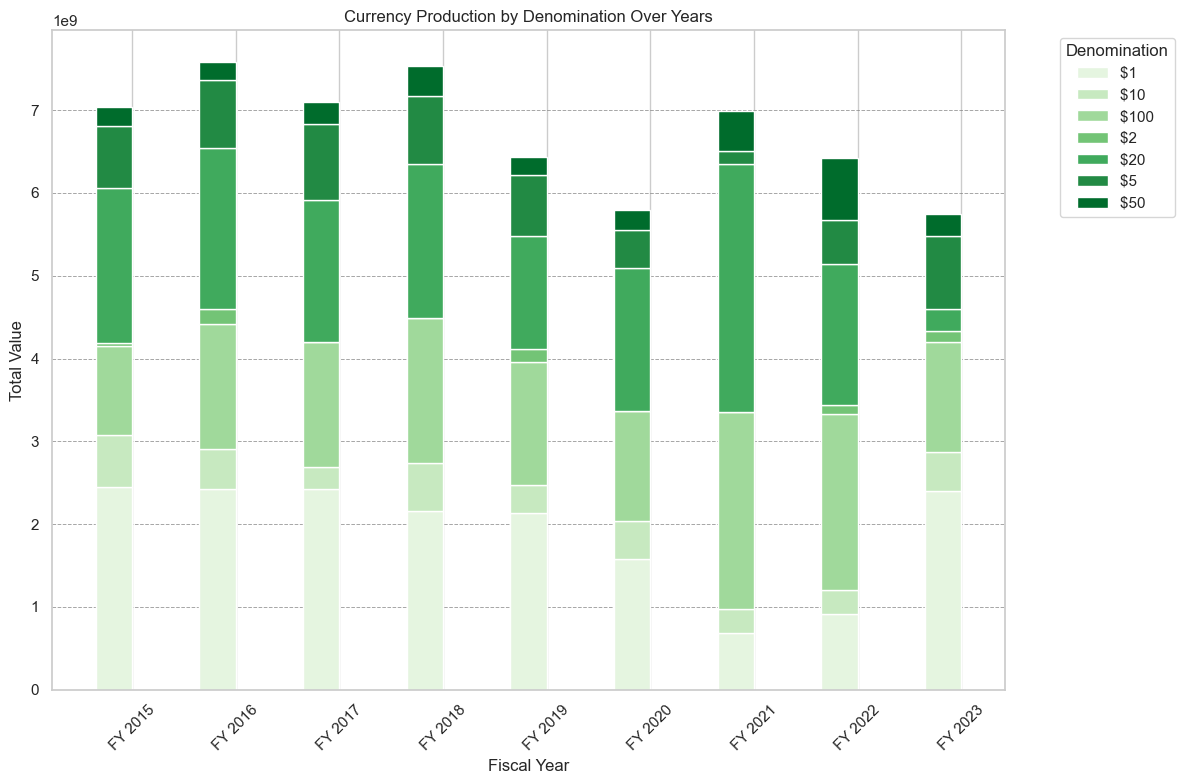

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your original DataFrame
# Transform your DataFrame from wide to long format
df_melted = df.melt(id_vars=["Year"], var_name="Denomination", value_name="Value")

# Clean and convert the 'Value' column to numeric, handling commas
df_melted['Value'] = df_melted['Value'].str.replace(',', '').astype(float)

# Convert 'Year' to string if not already
df_melted['Year'] = df_melted['Year'].astype(str)

# Pivot the table to get years as indices, denominations as columns, values as cell values
df_pivot = df_melted.pivot(index='Year', columns='Denomination', values='Value').fillna(0)

# Sort the DataFrame by 'Year' to maintain chronological order
df_pivot = df_pivot.sort_index()

# Green color palette (light to dark for the sake of example)
green_palette = ['#a4de02', '#76c849', '#4dac26', '#1b7837', '#00441b']

# Ensure we have enough colors for each denomination
if len(green_palette) < len(df_pivot.columns):
    # Generate a dynamic green palette if there are more denominations than static colors
    green_palette = sns.color_palette("Greens", n_colors=len(df_pivot.columns))

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bottom offset for each bar
bottom = np.zeros(len(df_pivot))

# Bar width
bar_width = 0.35

# Loop through each denomination and stack them, use green_palette for colors
for i, denomination in enumerate(df_pivot.columns):
    ax.bar(df_pivot.index, df_pivot[denomination], bottom=bottom, label=denomination, color=green_palette[i % len(green_palette)], width=bar_width)
    bottom += df_pivot[denomination].values

# Adjust the x-axis to add space between the bars
ax.set_xticks(np.arange(len(df_pivot.index)) + bar_width / 2)
ax.set_xticklabels(df_pivot.index)

# Improve grid appearance
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', linewidth=0.7, alpha=0.7)

# Add plot decorations
plt.title('Currency Production by Denomination Over Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.legend(title='Denomination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


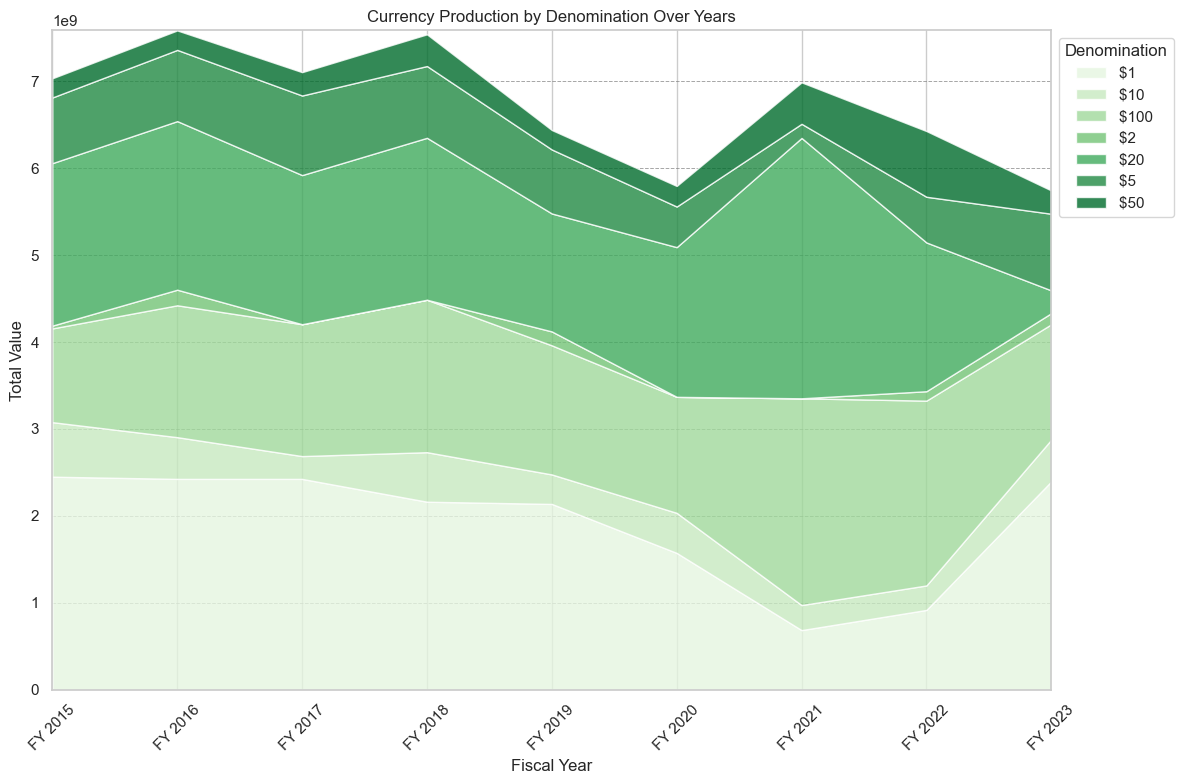

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your original DataFrame
# Transform your DataFrame from wide to long format
df_melted = df.melt(id_vars=["Year"], var_name="Denomination", value_name="Value")

# Clean and convert the 'Value' column to numeric, handling commas
df_melted['Value'] = df_melted['Value'].str.replace(',', '').astype(float)

# Convert 'Year' to string if not already
df_melted['Year'] = df_melted['Year'].astype(str)

# Pivot the table to get years as indices, denominations as columns, values as cell values
df_pivot = df_melted.pivot(index='Year', columns='Denomination', values='Value').fillna(0)

# Sort the DataFrame by 'Year' to maintain chronological order
df_pivot = df_pivot.sort_index()

# Preparing data for the stackplot
years = df_pivot.index
denominations = df_pivot.columns
data_to_plot = [df_pivot[denomination].values for denomination in denominations]

# Green color palette
green_palette = sns.color_palette("Greens", n_colors=len(denominations))

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Create the stackplot
ax.stackplot(years, data_to_plot, labels=denominations, colors=green_palette, alpha=0.8)

# Improve grid appearance and plot aesthetics
ax.margins(0, 0) # Remove margins
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', linewidth=0.7, alpha=0.7)
plt.xticks(rotation=45)
plt.legend(loc='upper left', title='Denomination', bbox_to_anchor=(1, 1))
plt.title('Currency Production by Denomination Over Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Value')

plt.tight_layout()
plt.show()


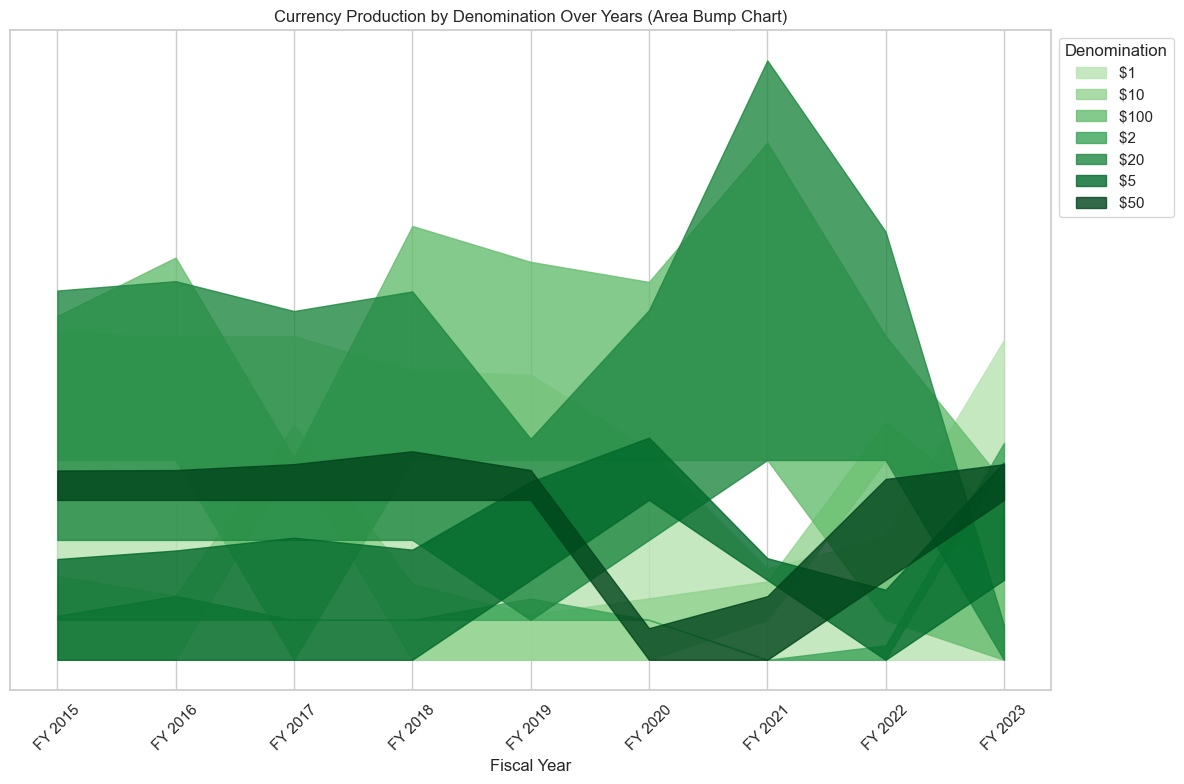

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df is your original DataFrame
# Transform your DataFrame from wide to long format
df_melted = df.melt(id_vars=["Year"], var_name="Denomination", value_name="Value")

# Clean and convert the 'Value' column to numeric, handling commas
df_melted['Value'] = df_melted['Value'].str.replace(',', '').astype(float)

# Convert 'Year' to string if not already
df_melted['Year'] = df_melted['Year'].astype(str)

# Pivot the table to get years as indices, denominations as columns, values as cell values
df_pivot = df_melted.pivot(index='Year', columns='Denomination', values='Value').fillna(0)

# Sort the DataFrame by 'Year' to maintain chronological order
df_pivot = df_pivot.sort_index()

# Prepare data for plotting
years = np.arange(len(df_pivot.index))
values = [df_pivot[denomination].values for denomination in df_pivot.columns]

# Calculate rankings based on values for each year
rankings = np.argsort(values, axis=0) + 1

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Set color palette
colors = plt.cm.Greens(np.linspace(0.3, 1, len(df_pivot.columns)))

# Maximum value for normalization
max_value = np.max(values)

# Plot each area
for i, (denomination, color) in enumerate(zip(df_pivot.columns, colors)):
    # Normalize values for better visibility
    normalized_values = values[i] / max_value * 100
    
    # Calculate the baseline for the bump (centering the areas)
    baseline = (max(rankings[i]) - rankings[i]) * 10  # Adjust multiplier as needed for spacing
    
    # Create the bump chart
    ax.fill_between(years, baseline, baseline + normalized_values, color=color, alpha=0.8, label=denomination)

# Improve aesthetics
ax.set_xticks(years)
ax.set_xticklabels(df_pivot.index, rotation=45)
ax.set_yticks([])
ax.legend(loc='upper left', title='Denomination', bbox_to_anchor=(1, 1))
plt.title('Currency Production by Denomination Over Years (Area Bump Chart)')
plt.xlabel('Fiscal Year')

plt.tight_layout()
plt.show()
